# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [74]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

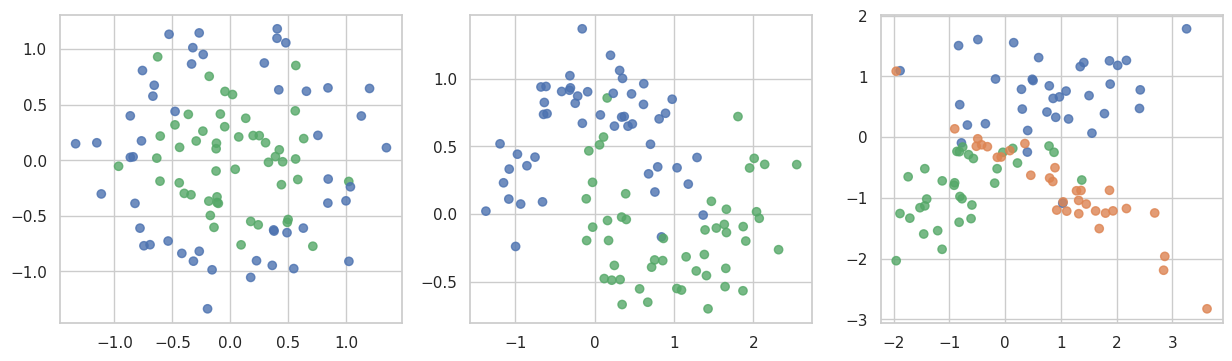

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [66]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7, edgecolors=np.array(palette)[y], linewidths=2)

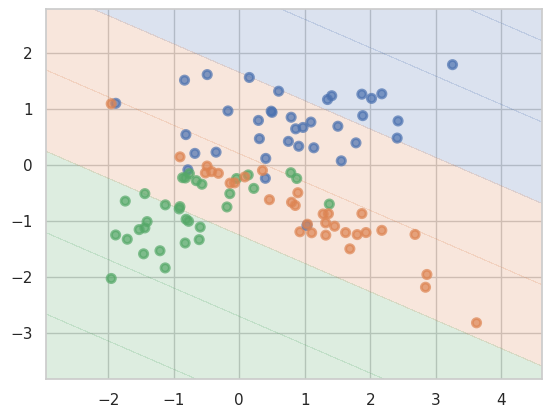

In [75]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Ответ:__

In [95]:
dataset_names = ["make_circles", "maek_moons", "make_classification"]

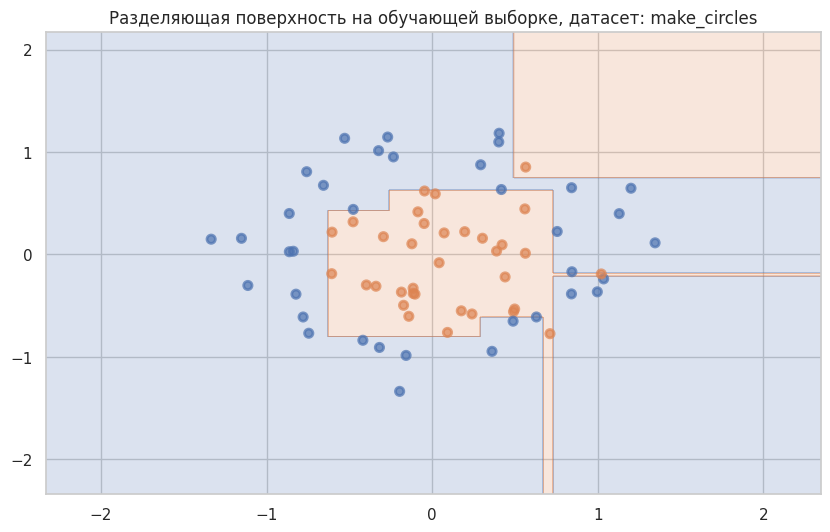

Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.80
Модель переобучилась.


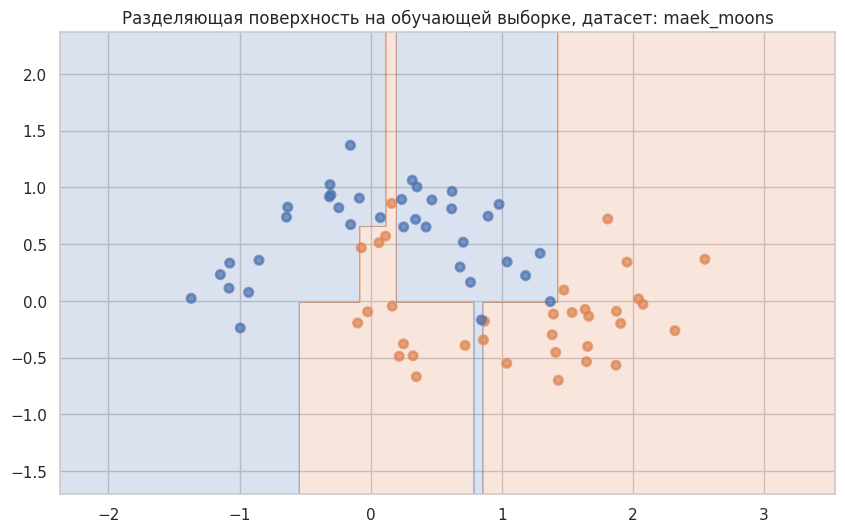

Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.93
Модель не переобучилась.


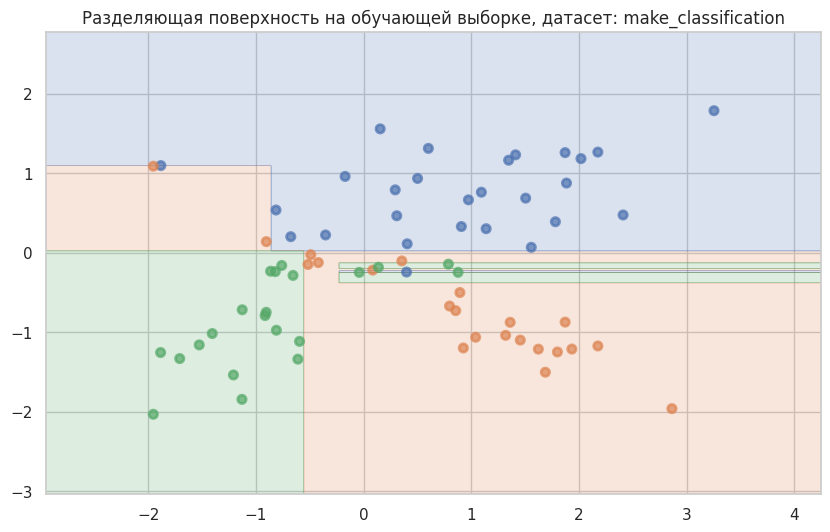

Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.73
Модель переобучилась.


In [94]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd


for i, (x, y) in enumerate(datasets):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

  clf = DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  plt.figure(figsize=(10, 6))
  plot_surface(clf, X_train, y_train)
  plt.title(f"Разделяющая поверхность на обучающей выборке, датасет: {dataset_names[i]}")
  plt.show()

  train_accuracy = accuracy_score(y_train, clf.predict(X_train))
  test_accuracy = accuracy_score(y_test, clf.predict(X_test))

  print(f"Точность на обучающей выборке: {train_accuracy:.2f}")
  print(f"Точность на тестовой выборке: {test_accuracy:.2f}")

  if train_accuracy - test_accuracy > 0.1:
      print("Модель переобучилась.")
  else:
      print("Модель не переобучилась.")

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Ответ:__

dataset=make_circles, max_depth=2, min_samples_leaf=1
Точность на обучающей выборке: 0.77
Точность на тестовой выборке: 0.57
dataset=make_circles, max_depth=2, min_samples_leaf=10
Точность на обучающей выборке: 0.77
Точность на тестовой выборке: 0.57
dataset=make_circles, max_depth=10, min_samples_leaf=1
Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.77
dataset=make_circles, max_depth=10, min_samples_leaf=10
Точность на обучающей выборке: 0.89
Точность на тестовой выборке: 0.83
dataset=maek_moons, max_depth=2, min_samples_leaf=1
Точность на обучающей выборке: 0.93
Точность на тестовой выборке: 0.90
dataset=maek_moons, max_depth=2, min_samples_leaf=10
Точность на обучающей выборке: 0.84
Точность на тестовой выборке: 0.80
dataset=maek_moons, max_depth=10, min_samples_leaf=1
Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.93
dataset=maek_moons, max_depth=10, min_samples_leaf=10
Точность на обучающей выборке: 0.84
Точность на тестовой выборке: 0.80


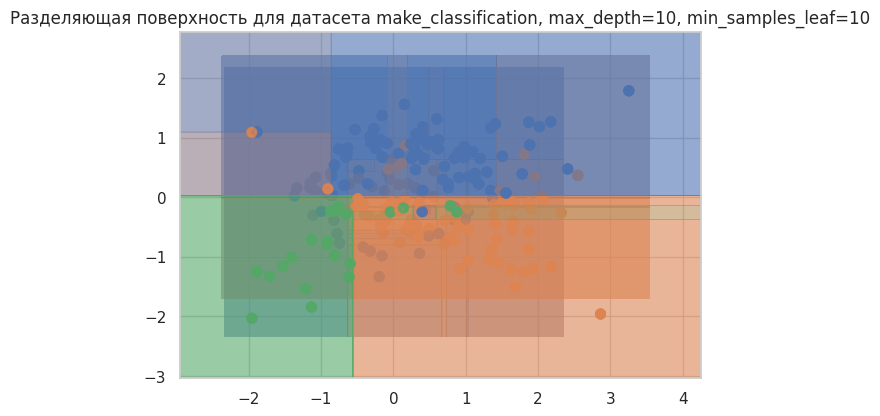

In [98]:
max_depth_values = [2, 10]
min_samples_leaf_values = [1, 10]

for i, (x, y) in enumerate(datasets):
  for max_depth in max_depth_values:
      for min_samples_leaf in min_samples_leaf_values:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(X_train, y_train)
        plot_surface(clf, X_train, y_train)
        train_accuracy = accuracy_score(y_train, clf.predict(X_train))
        test_accuracy = accuracy_score(y_test, clf.predict(X_test))
        plt.title(f"Разделяющая поверхность для датасета {dataset_names[i]}, max_depth={max_depth}, min_samples_leaf={min_samples_leaf}")
        plt.show() #Закомментируйте чтобы видеть только циферки
        print(f"dataset={dataset_names[i]}, max_depth={max_depth}, min_samples_leaf={min_samples_leaf}")
        print(f"Точность на обучающей выборке: {train_accuracy:.2f}")
        print(f"Точность на тестовой выборке: {test_accuracy:.2f}")


Для make_circles и make_classification более сложные модели (с большим max_depth и меньшими значениями min_samples_leaf) показывают хорошие результаты на обучающей выборке, но переобучаются, что ухудшает результаты на тестовой выборке.

Для make_moons менее глубокие модели (с меньшим max_depth и большим min_samples_leaf) уже могут хорошо обобщать, показывая хорошие результаты на обеих выборках, в то время как более глубокие деревья приводят к переобучению, что не всегда приводит к улучшению тестовой точности.

Различия между разными датасетами связаны, скорее всего, со структурой их данных, тем, насколько сложно их классифицировать

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

In [99]:
def find_best_split(feature_vector, target_vector):
    sorted_indices = np.argsort(feature_vector)
    feature_vector_sorted = feature_vector[sorted_indices]
    target_vector_sorted = target_vector[sorted_indices]

    def compute_gini(subset):
        p0 = np.sum(subset == 0) / len(subset)
        p1 = 1 - p0
        return 1 - p0 ** 2 - p1 ** 2

    thresholds = []
    ginis = []
    gini_best = float('inf')
    threshold_best = None

    for i in range(1, len(feature_vector_sorted)):
        if feature_vector_sorted[i] == feature_vector_sorted[i - 1]:
            continue

        threshold = (feature_vector_sorted[i] + feature_vector_sorted[i - 1]) / 2
        left_target = target_vector_sorted[:i]
        right_target = target_vector_sorted[i:]

        gini_left = compute_gini(left_target)
        gini_right = compute_gini(right_target)

        gini = (len(left_target) / len(feature_vector_sorted)) * gini_left + (
                    len(right_target) / len(feature_vector_sorted)) * gini_right

        thresholds.append(threshold)
        ginis.append(gini)

        if gini < gini_best:
            gini_best = gini
            threshold_best = threshold

    return np.array(thresholds), np.array(ginis), threshold_best, gini_best


__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

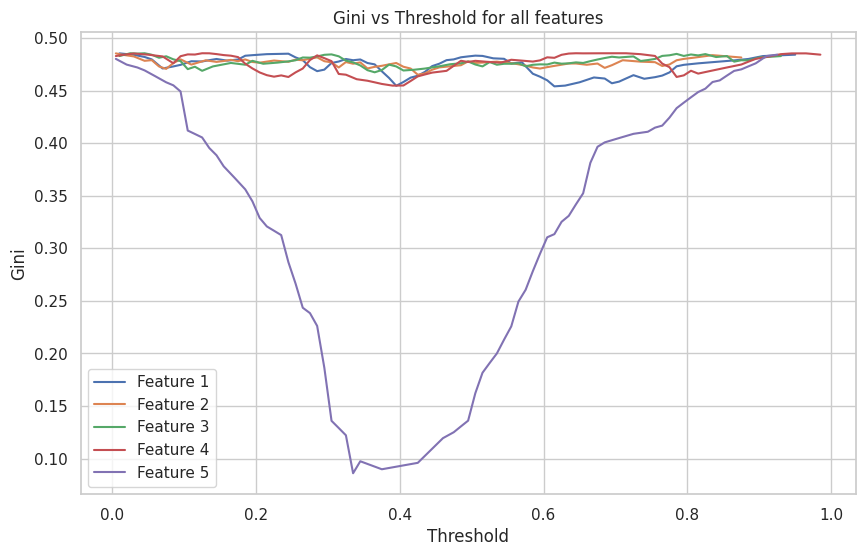

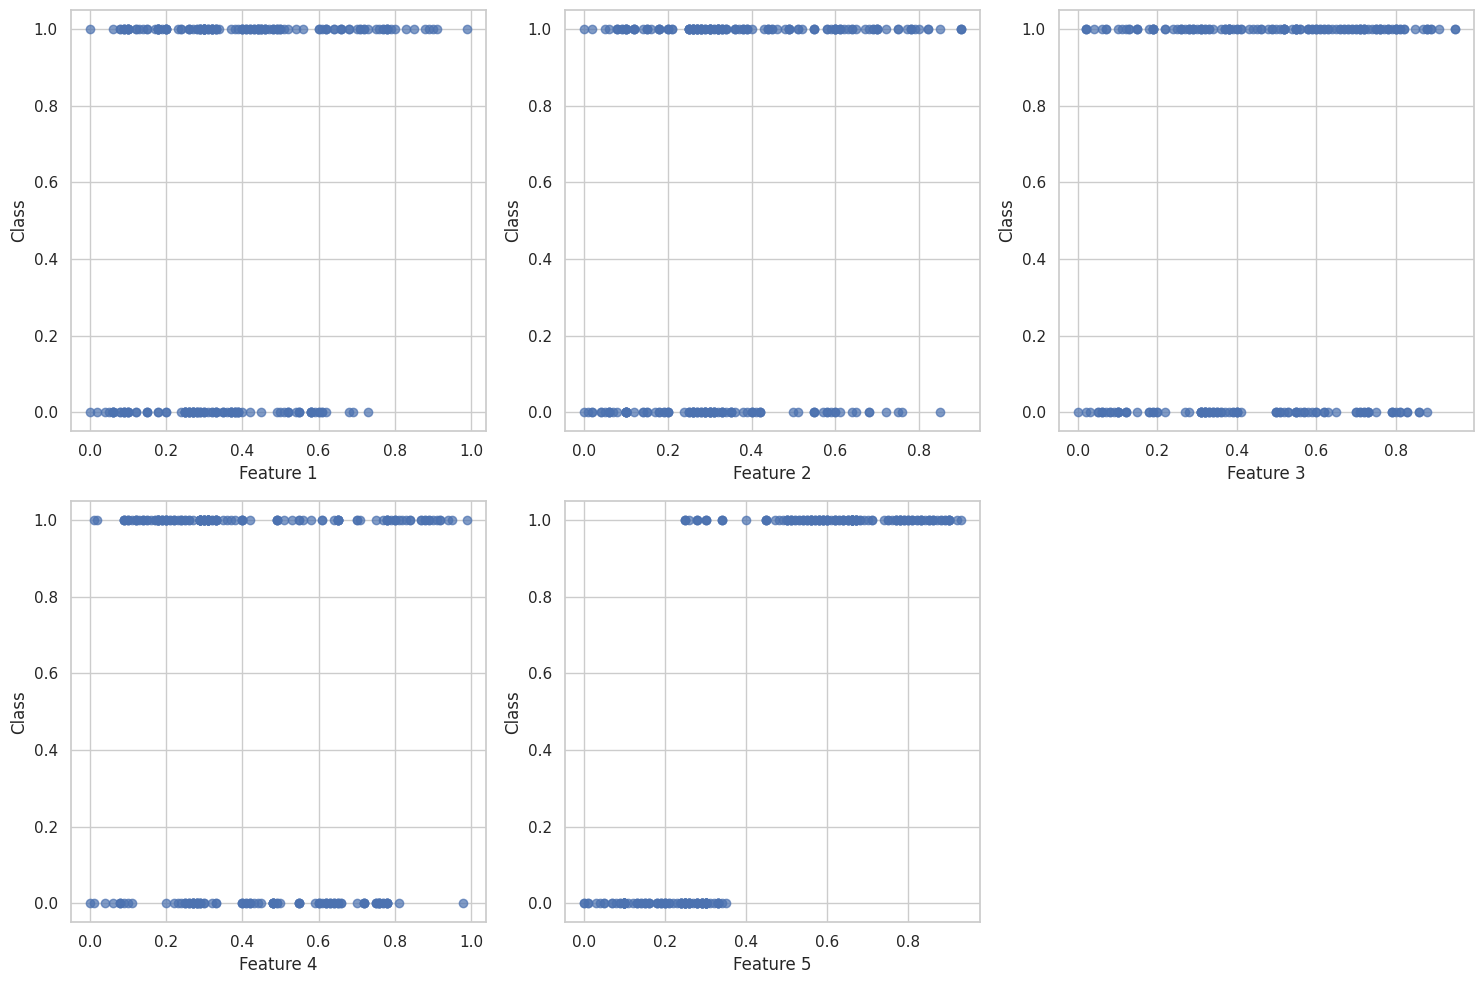

In [100]:
df = pd.read_csv("https://raw.githubusercontent.com/kalane15/Mai-ML/refs/heads/main/hw2/datasets/students.csv")
X = df.iloc[:, :5]
y = df.iloc[:, -1]

plt.figure(figsize=(10,6))
for i in range(X.shape[1]):
    thresholds, ginis, _, _ = find_best_split(X.iloc[:, i].values, y.values)
    plt.plot(thresholds, ginis, label=f"Feature {i+1}")
plt.xlabel("Threshold")
plt.ylabel("Gini")
plt.title("Gini vs Threshold for all features")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
for i in range(X.shape[1]):
    plt.subplot(2,3,i+1)
    plt.scatter(X.iloc[:, i], y, alpha=0.7)
    plt.xlabel(f"Feature {i+1}")
    plt.ylabel("Class")
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

По Feature 5, так как на графике есть очень маленькое значение джини, что нам и нужно.
Этот результат согласуется с графиками. Как мы видим, для 5 ого признака можно легко найти конкретный порог, который разделит классы почти однородно. Для остальных признаков такого порога нет.
Кривые для признаков, по которым возможно деление, имеют чёткий явный минимум Джини, при котором деление почти идеально.
Кривые для признаков, по которым деление почти невозможно, кривые более плоские, без явных минимумов, значения Джини остаются высокими для всех порогов, что указывает на невозможность хорошего разделения.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [148]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")
        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth=0):
        if np.all(sub_y == sub_y[0]) or \
           (self._max_depth is not None and depth >= self._max_depth) or \
           (len(sub_y) < self._min_samples_split):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    current_click = clicks.get(key, 0)
                    ratio[key] = current_count / (current_click + 1e-10)
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))
                feature_vector = np.array([categories_map[x] for x in sub_X[:, feature]])
            else:
                raise ValueError

            if len(feature_vector) == 3:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if (gini_best is None or gini < gini_best) and threshold is not None:
                left_mask = feature_vector < threshold
                right_mask = np.logical_not(left_mask)
                if left_mask.sum() < self._min_samples_leaf or right_mask.sum() < self._min_samples_leaf:
                    continue
                feature_best = feature
                gini_best = gini
                split = left_mask
                threshold_best = threshold if feature_type == "real" else [k for k, v in categories_map.items() if v < threshold]

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        else:
            node["categories_split"] = threshold_best
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        feature = node["feature_split"]
        if self._feature_types[feature] == "real":
            if x[feature] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            if x[feature] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        return np.array([self._predict_node(x, self._tree) for x in X])

    def get_params(self, deep=True):
        return {"feature_types": self._feature_types,
                "max_depth": self._max_depth,
                "min_samples_split": self._min_samples_split,
                "min_samples_leaf": self._min_samples_leaf}

    def set_params(self, **params):
        self._feature_types = params.get("feature_types", self._feature_types)
        self._max_depth = params.get("max_depth", self._max_depth)
        self._min_samples_split = params.get("min_samples_split", self._min_samples_split)
        self._min_samples_leaf = params.get("min_samples_leaf", self._min_samples_leaf)
        return self


__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [149]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/kalane15/Mai-ML/refs/heads/main/hw2/datasets/agaricus-lepiota.data"
df = pd.read_csv(url, header=None)

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
feature_types = ["categorical"] * X_train.shape[1]
tree = DecisionTree(feature_types)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 1.0000


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

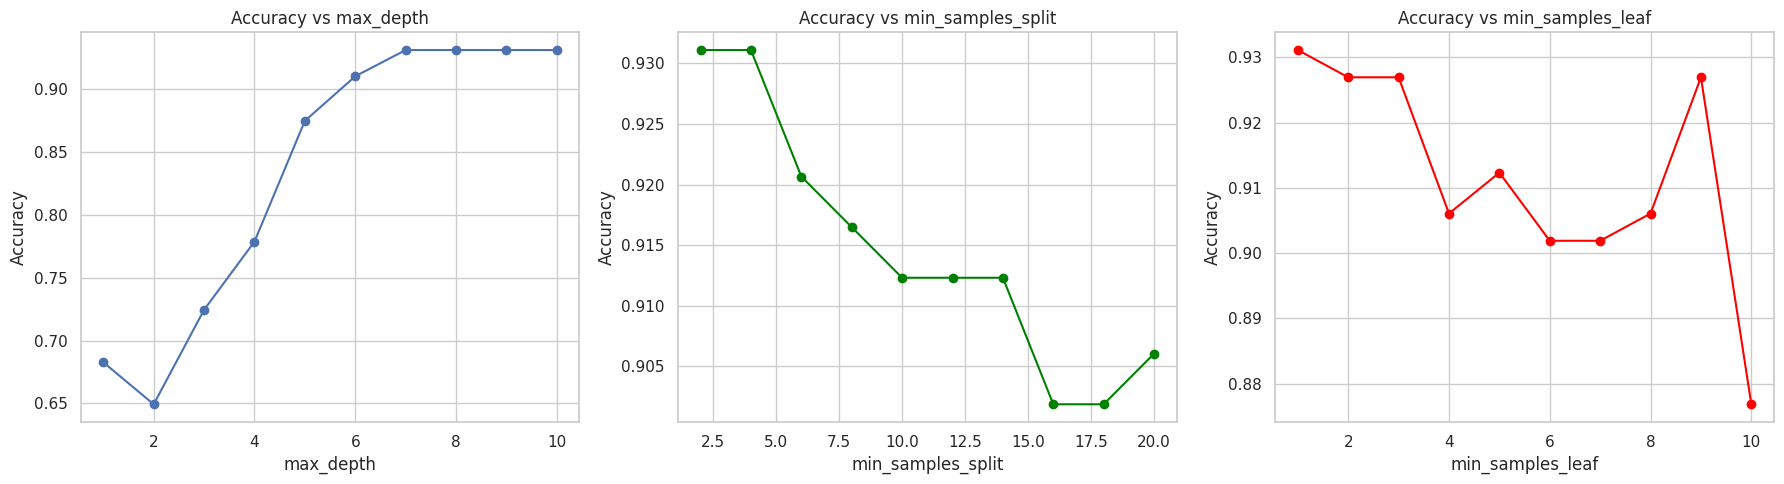

In [153]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/kalane15/Mai-ML/refs/heads/main/hw2/datasets/tic-tac-toe-endgame.csv"
df = pd.read_csv(url)

X = df.drop(df.columns[-1], axis=1)
y = df.iloc[:, -1]

X_le = X.copy()
feature_types = []
for col in X_le.columns:
    X_le[col] = LabelEncoder().fit_transform(X_le[col])
    feature_types.append("categorical")

y_le = LabelEncoder().fit_transform(y)
X_values = X_le.values
y_values = y_le

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.5, random_state=2)

max_depths = range(1, 11)
min_samples_splits = range(2, 21, 2)
min_samples_leafs = range(1, 11)

acc_depth = []
for d in max_depths:
    tree = DecisionTree(feature_types, max_depth=d)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc_depth.append(accuracy_score(y_test, y_pred))

acc_split = []
for s in min_samples_splits:
    tree = DecisionTree(feature_types, min_samples_split=s)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc_split.append(accuracy_score(y_test, y_pred))

acc_leaf = []
for l in min_samples_leafs:
    tree = DecisionTree(feature_types, min_samples_leaf=l)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc_leaf.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(max_depths, acc_depth, marker='o')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs max_depth")

plt.subplot(1, 3, 2)
plt.plot(min_samples_splits, acc_split, marker='o', color='green')
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("Accuracy vs min_samples_split")

plt.subplot(1, 3, 3)
plt.plot(min_samples_leafs, acc_leaf, marker='o', color='red')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Accuracy vs min_samples_leaf")

plt.tight_layout()
plt.show()


__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [146]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import KFold

datasets = {
    "mushrooms": "https://raw.githubusercontent.com/kalane15/Mai-ML/refs/heads/main/hw2/datasets/agaricus-lepiota.data",
    "tic-tac-toe": "https://raw.githubusercontent.com/kalane15/Mai-ML/refs/heads/main/hw2/datasets/tic-tac-toe-endgame.csv",
    "cars": "https://raw.githubusercontent.com/kalane15/Mai-ML/refs/heads/main/hw2/datasets/car.data",
    "nursery": "https://raw.githubusercontent.com/kalane15/Mai-ML/refs/heads/main/hw2/datasets/nursery.data"
}

results = []

for name, url in datasets.items():
    if name == "mushrooms":
        df = pd.read_csv(url, header=None)
        target_idx = 0
    else:
        df = pd.read_csv(url)
        target_idx = -1

    X = df.drop(df.columns[target_idx], axis=1)
    y = df.iloc[:, target_idx]

    X_le = X.copy()
    for col in X_le.columns:
        X_le[col] = LabelEncoder().fit_transform(X_le[col])

    y_le = LabelEncoder().fit_transform(y)

    ohe = OneHotEncoder(sparse_output=False)
    X_ohe = ohe.fit_transform(X_le)

    sk_dt = DecisionTreeClassifier()

    dt_real = DecisionTree(feature_types=["real"]*X_le.shape[1])
    dt_cat = DecisionTree(feature_types=["categorical"]*X_le.shape[1])
    dt_real_ohe = DecisionTree(feature_types=["real"]*X_ohe.shape[1])

    acc_real = cross_val_score(dt_real, X_le.values, y_le, cv=10, scoring=make_scorer(accuracy_score)).mean()
    acc_cat = cross_val_score(dt_cat, X_le.values, y_le, cv=10, scoring=make_scorer(accuracy_score)).mean()
    acc_real_ohe = cross_val_score(dt_real_ohe, X_ohe, y_le, cv=10, scoring=make_scorer(accuracy_score)).mean()
    acc_sklearn = cross_val_score(sk_dt, X_le.values, y_le, cv=10, scoring=make_scorer(accuracy_score)).mean()

    results.append([name, acc_real, acc_cat, acc_real_ohe, acc_sklearn])

df_results = pd.DataFrame(results, columns=["Dataset", "DT_real", "DT_cat", "DT_real_ohe", "Sklearn_DT"])
print(df_results)


       Dataset   DT_real    DT_cat  DT_real_ohe  Sklearn_DT
0    mushrooms  0.999261  1.000000     0.999631    0.956689
1  tic-tac-toe  0.469605  0.562314     0.561272    0.770669
2         cars  0.867371  0.866857     0.806016    0.865204
3      nursery  0.591867  0.639266     0.597114    0.803768


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Результаты показывают, что ранжирование алгоритмов сильно зависит от конкретного датасета и структуры признаков.

Для mushrooms кастомное дерево с учётом категориальных признаков (DT_cat) достигает почти идеальной точности (1.0), а Sklearn DT показывает чуть меньшую (~0.956). Это связано с тем, что все признаки категориальные, а кастомная реализация правильно обрабатывает их «как есть», без потери информации. Для этого датасета one-hot кодирование практически не улучшает результат, поскольку оно увеличивает размерность, но не добавляет новой информации.

Для tic-tac-toe и nursery точность кастомного дерева ниже, чем у Sklearn DT, особенно на «реальных» признаках или после OHE. Это объясняется тем, что кастомное дерево не оптимизировано и не всегда эффективно выбирает разбиения на больших комбинациях категорий.

Для cars результаты всех деревьев примерно одинаковы, что говорит о том, что структура признаков и классов относительно проста, и оба подхода находят эффективные разбиения.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [ ]:
from mai import pain